<a href="https://colab.research.google.com/github/Buyan-Kirill/practice-VTM-sem-8/blob/main/Tensors_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

In [65]:
def r_svd(Matrice, rank, scale=None, seed=None):
  if seed != None:
    np.random.seed(seed)

  m, n = Matrice.shape
  if scale == None:
    k = rank * log(n)
  else:
    k = rank * scale
  X = np.random.rand(n, min(int(k), n))

  Y = Matrice @ X
  Q, R = np.linalg.qr(Y, mode='reduced')

  Z = Q.T @ Matrice
  U, Sigma, V = np.linalg.svd(Z, full_matrices=False)
  U = Q @ U

  return U[:, :rank], Sigma[:rank], V[:rank, :]

In [66]:
def tester(errors, sizes):
    plt.plot(sizes, errors, label="Approximation error")
    plt.xlabel("Rank")
    plt.ylabel("Error")
    plt.legend()
    plt.show()

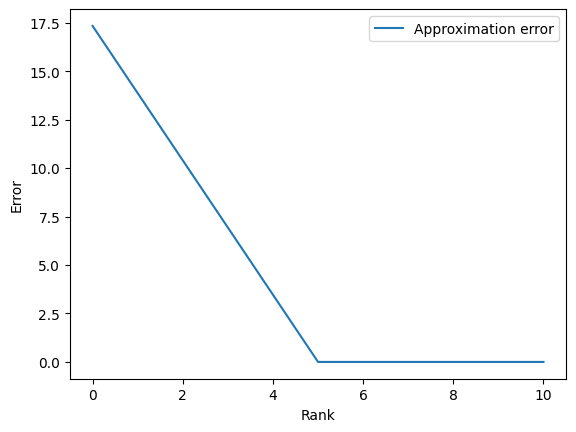

In [67]:
N = 100
errors = []
sizes = []

A = np.zeros(shape=(N, N))
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        A[i, j] = sin(1 / (i + 1) + 1 / (j + 1))

for i in range(0, N // 8, 5):
  U, S, V = r_svd(A, i, scale=40, seed=30)
  errors += [np.linalg.norm(A - U @ np.diag(S) @ V)]
  sizes += [i]

tester(errors, sizes)

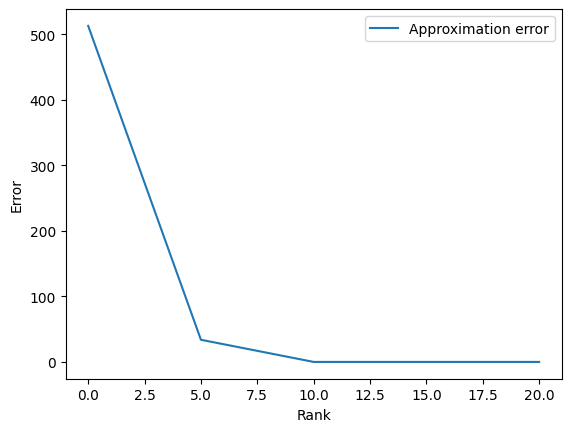

In [68]:
errors = []
sizes = []

N = 200
np.random.seed(42)
A = np.zeros(shape=(N, N))
U = np.random.rand(N, 10)
V = np.random.rand(10, N)
A += U @ V

for i in range(0, N // 8, 5):
  U, S, V = r_svd(A, i, scale=40, seed=30)
  errors += [np.linalg.norm(A - U @ np.diag(S) @ V)]
  sizes += [i]

tester(errors, sizes)

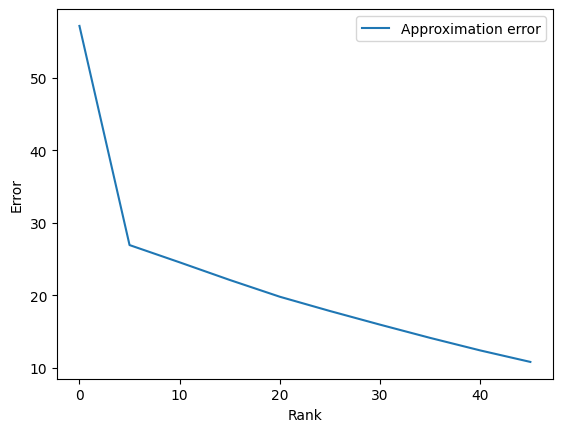

In [69]:
np.random.seed(42)
N = 100
errors = []
sizes = []

A = np.random.rand(N, N)
for i in range(0, N // 2, 5):
  U, S, V = r_svd(A, i, seed=42)
  errors += [np.linalg.norm(A - U @ np.diag(S) @ V)]
  sizes += [i]

tester(errors, sizes)

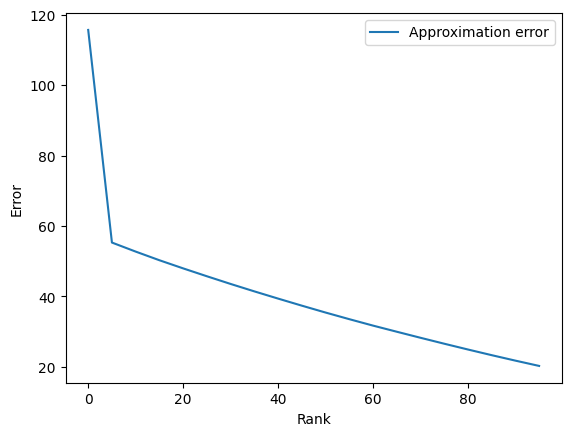

In [70]:
np.random.seed(30)
N = 200
errors = []
sizes = []

A = np.random.rand(N, N)
for i in range(0, N // 2, 5):
  U, S, V = r_svd(A, i, scale=40, seed=30)
  errors += [np.linalg.norm(A - U @ np.diag(S) @ V)]
  sizes += [i]

tester(errors, sizes)